In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
isocronas = pd.read_csv('../../Isocronas/Regression_Iso.txt', header = 0)

In [3]:
from scipy.interpolate import interp1d

Text(0.5, 1.0, 'Interpolação linear: cor do turnoff \n em função da idade')

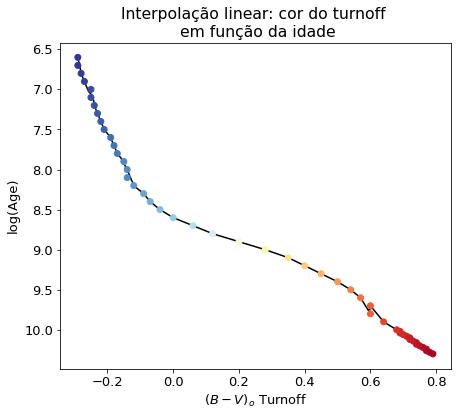

In [4]:
f1 = interp1d(isocronas['(B-V)TurnOff'],  isocronas['Age'],kind= 'linear')
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots(figsize=(7,6)) #(figsize=(10,8))
plt.gca().invert_yaxis()



interpol_colour = np.linspace(isocronas['(B-V)TurnOff'].min(),isocronas['(B-V)TurnOff'].max(),100)
plt.plot(interpol_colour,f1(interpol_colour), color = 'k')
plt.scatter(isocronas['(B-V)TurnOff'], isocronas['Age'], c = isocronas['(B-V)TurnOff'],cmap = 'RdYlBu_r', zorder = 10)
plt.ylabel('log(Age)')
plt.xlabel(r'$(B-V)_o$' + ' Turnoff')
plt.title('Interpolação linear: cor do turnoff \n em função da idade')


In [ ]:
#plt.scatter( isocronas['Age'], isocronas['(B-V)TurnOff'],   cmap = 'RdYlBu_r')

## Aglomerado 2, E(B-V)=0.5

In [5]:
ag2 = pd.read_csv('../P1/LinearRegressAG2.txt', header = 0)
E = 0.5
ag2.head()

,Slope,Intercept,Slope_Error,Intercept_Error,TurnOffColor
0,5.854872,6.137198,0.023602,0.030893,0.329951


In [6]:
idade2 = f1(ag2['TurnOffColor ']-E)
idade2

array([7.7995101])

In [7]:
idade2=7.8

In [8]:
isocro2 = isocronas[isocronas['Age'] ==idade2]
isocro2

,Age,Slope,Intercept,Slope_Error,Intercept_Error,R_Value,(B-V)TurnOff,MvTurnOff,Ajustadas/Total
37,7.8,5.909142,0.94259,0.046907,0.027805,0.999811,-0.17,-1.25,0.16666666666666666= 8/48


In [9]:
## Método do Slope do Aglomerado
def distancia(a,b,b0,E):
    return 10**((a*E + (b-b0) - E*3.1 + 5 )/5)
d2 = distancia(ag2['Slope'].item(), ag2[' Intercept'].item(), isocro2['Intercept'].item(),E)
d2

206.25702587588438

In [10]:
i2 = pd.read_csv('../P1/ag2.txt',header = 0)
i2.head()

,B-V,V
0,1.110742,12.999174
1,0.426737,8.766554
2,1.962863,16.706395
3,1.812563,16.906182
4,1.062060,11.962806


In [11]:
iso = pd.read_csv('../../Isocronas/isocro.csv', header = 0)

idades = iso['log(Age)']
age = np.array([])
for element in idades:
    if element in age:
        continue
    elif element not in age:
        age = np.append(age,element)

iso2 = iso[iso['log(Age)']==idade2]

Text(0, 0.5, '$V$')

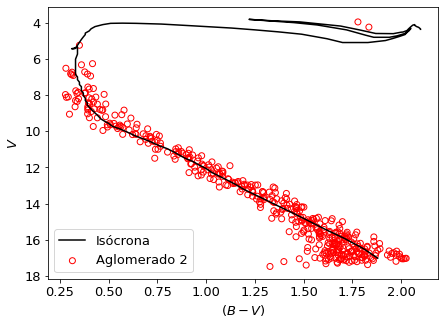

In [12]:
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots(figsize=(7,5)) #(figsize=(10,8))
plt.gca().invert_yaxis()
plt.plot(iso2['(B-V)o'] + E,iso2['Mv'] +5*np.log10(d2/10)+3.1*E , label = 'Isócrona', color = 'black', zorder = 10)
plt.scatter(i2['B-V'] ,i2['V'], label = 'Aglomerado 2', color = 'none', edgecolor = 'red')
plt.legend(frameon=True)
plt.xlabel(r"$(B-V)$")
plt.ylabel(r"$V$")
#plt.title('Ajuste da Isócrona de log(Age ) = 7.8')

In [13]:
modulodist = 5*np.log10(d2/10) + E*3.1
Xiso = iso2['(B-V)o'] + E
Yiso = iso2['Mv'] + modulodist 
Xaglo = i2['B-V'] 
Yaglo = i2['V']

dist_pontos = np.zeros_like(Xaglo)
distancias = []
for i in range(len(Xaglo)):
    pontos_aglo = np.array([Xaglo[i],Yaglo[i]])
    for x,y in zip(Xiso,Yiso):
        xy = np.array([x,y])
        distancias.append(np.linalg.norm(xy-pontos_aglo))
    dist_pontos[i] = min(distancias)

dist_pontos.mean(), modulodist

(0.007773259307544014, 8.122043755737868)

In [14]:
n_interacoes = 30
incremento = 0.05
medias = np.zeros((2,n_interacoes))
dist_loop = modulodist
for j in range(0,n_interacoes,1):
    dist_loop = dist_loop - incremento
    Xiso = iso2['(B-V)o'] + E
    Yiso = iso2['Mv'] + dist_loop 
    Xaglo = i2['B-V'] 
    Yaglo = i2['V']
    dist_pontos = np.zeros_like(Xaglo)
    distancias = []
    for i in range(len(Xaglo)):
        pontos_aglo = np.array([Xaglo[i],Yaglo[i]])
        for x,y in zip(Xiso,Yiso):
            xy = np.array([x,y])
            distancias.append(math.dist(xy,pontos_aglo))
        dist_pontos[i] = min(distancias)
    medias[0][j] = dist_pontos.mean()
    medias[1][j] = np.std(dist_pontos)

In [18]:
local = np.where(medias[0]==min(medias[0]))
local

(array([19]),)

Text(0, 0.5, '$V$')

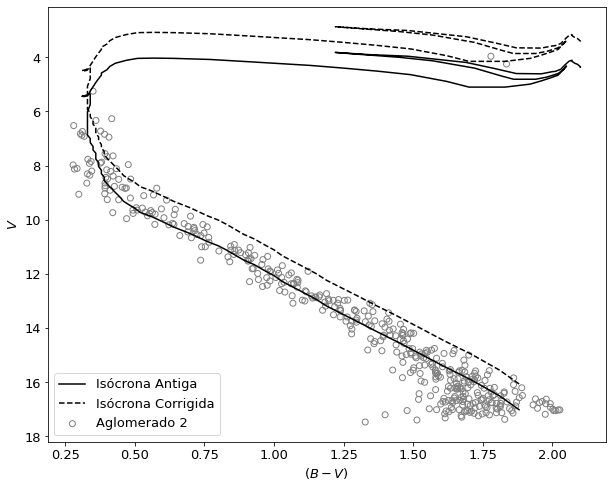

In [46]:
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots(figsize=(10,8)) #(figsize=(10,8))
plt.gca().invert_yaxis()
plt.plot(iso2['(B-V)o'] + E,iso2['Mv'] + modulodist , label = 'Isócrona Antiga', color = 'black', zorder = 10)
plt.plot(iso2['(B-V)o'] + E,iso2['Mv'] + modulodist - 0.05*local[0], '--', label = 'Isócrona Corrigida', color = 'black', zorder = 10)
plt.scatter(i2['B-V'] ,i2['V'], label = 'Aglomerado 2', color = 'none', edgecolor = 'grey')
plt.legend(frameon=True)
plt.xlabel(r"$(B-V)$")
plt.ylabel(r"$V$")
#plt.title('Ajuste da Isócrona de log(Age ) = 7.0 \n Método Slope Aglomerado')

In [17]:
real = 8 - 0.5*3.1
real, modulodist, modulodist - 19*0.05

(6.45, 8.122043755737868, 7.172043755737868)

In [21]:
np.where(medias[0]==medias[0].min()),np.where(medias[1]==medias[1].min())

((array([19]),), (array([4]),))

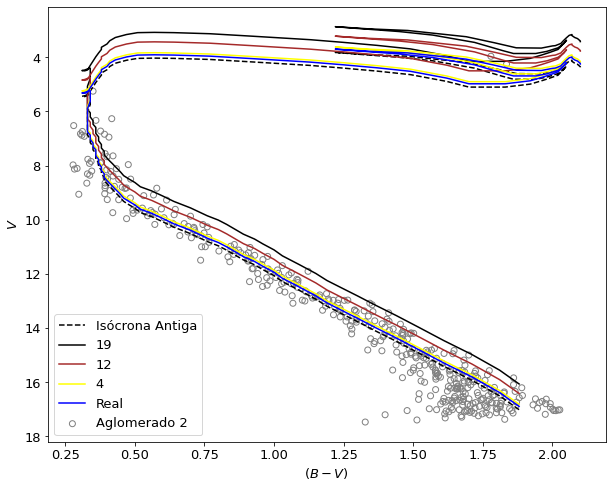

In [45]:
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

fig,ax = plt.subplots(figsize=(10,8)) #(figsize=(10,8))
plt.gca().invert_yaxis()
plt.plot(iso2['(B-V)o'] + E,iso2['Mv'] + modulodist , '--', label = 'Isócrona Antiga', color = 'black', zorder = 10)
plt.plot(iso2['(B-V)o'] + E,iso2['Mv'] + modulodist - 0.05*local[0], label = '19', color = 'black', zorder = 10)
plt.plot(iso2['(B-V)o'] + E,iso2['Mv'] + modulodist - 0.05*12, label = '12', color = 'brown', zorder = 10)
plt.plot(iso2['(B-V)o'] + E,iso2['Mv'] + modulodist - 0.05*4, label = '4', color = 'yellow', zorder = 10)
plt.plot(iso2['(B-V)o'] + E,iso2['Mv'] + 8, label = 'Real', color = 'blue', zorder = 10)
plt.scatter(i2['B-V'] ,i2['V'], label = 'Aglomerado 2', color = 'none', edgecolor = 'grey')
plt.legend(frameon=True)
plt.xlabel(r"$(B-V)$")
plt.ylabel(r"$V$");